<a href="https://colab.research.google.com/github/MuhammadUsmanAslam111/ai_intern_week_03/blob/master/differen_implementation_of_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES AND LOADING CSV

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/WineQT.csv")


In [26]:
 # Round all numeric columns to 4 decimal places
 df= df.round(4)
 print(df.head())
 print(df.info())
 print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [27]:
# Count missing values per column
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


NO MISSING VALUE IN THE GIVEN DATA SET


In [28]:
df.drop('Id', axis=1, inplace=True)


In [44]:
import matplotlib.pyplot as plt
import numpy as np

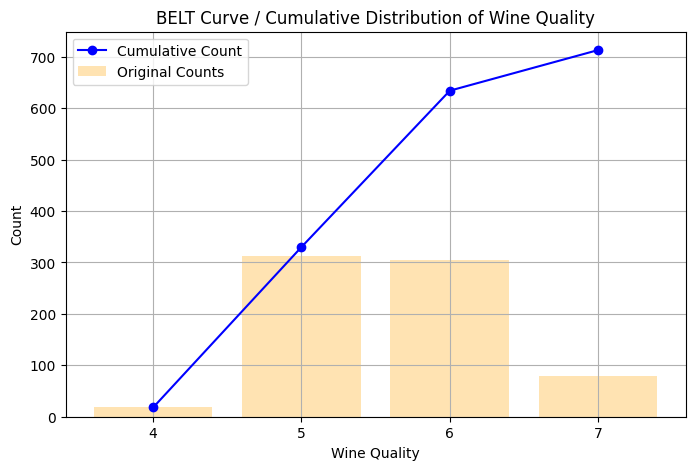

In [46]:
plt.figure(figsize=(8,5))

# Plot cumulative curve
plt.plot(counts.index, cumulative_counts, marker='o', linestyle='-', color='b', label='Cumulative Count')

# Optional: also plot original counts as bars
plt.bar(counts.index, counts, alpha=0.3, color='orange', label='Original Counts')

plt.title("BELT Curve / Cumulative Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.xticks(counts.index)
plt.legend()
plt.grid(True)
plt.show()

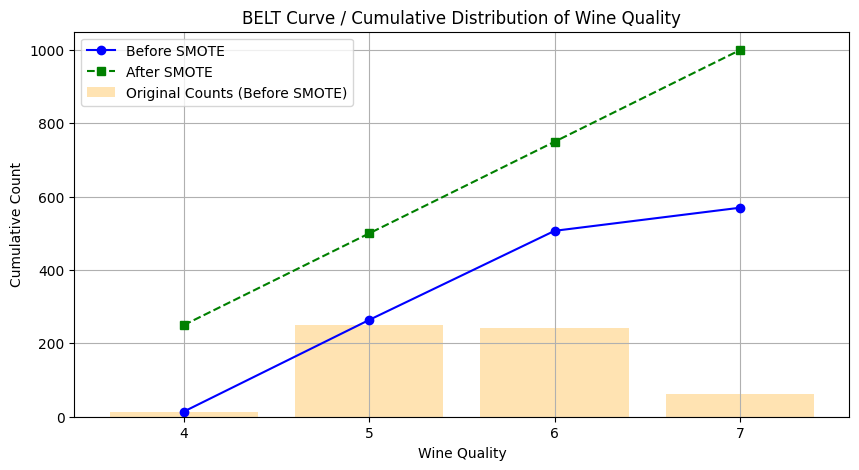

In [47]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['quality'], axis=1)
y = df['quality'].astype(int)

# Split data first (important: only oversample training data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_aug, y_train_aug = smote.fit_resample(X_train, y_train)

# Count original and augmented training data
counts_before = y_train.value_counts().sort_index()
counts_after = y_train_aug.value_counts().sort_index()

# Cumulative counts
cum_before = counts_before.cumsum()
cum_after = counts_after.cumsum()

# Plot BELT curves
plt.figure(figsize=(10,5))

plt.plot(counts_before.index, cum_before, marker='o', linestyle='-', color='blue', label='Before SMOTE')
plt.plot(counts_after.index, cum_after, marker='s', linestyle='--', color='green', label='After SMOTE')

# Optional: overlay original bars for before
plt.bar(counts_before.index, counts_before, alpha=0.3, color='orange', label='Original Counts (Before SMOTE)')

plt.title("BELT Curve / Cumulative Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Cumulative Count")
plt.xticks(counts_before.index)
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Count the number of samples per quality class
counts = df['quality'].value_counts().sort_index()  # sort by quality

# Calculate cumulative sum
cumulative_counts = np.cumsum(counts)

In [29]:
print(df.duplicated().sum())  # How many duplicate rows?
df.drop_duplicates(inplace=True)  # Remove them if any


125


In [30]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [31]:
df[df["quality"]==8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
190,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
197,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8
310,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
321,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8
340,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8
349,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.9917,3.72,0.74,14.0,8
747,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.9946,3.21,0.69,12.5,8
769,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.9945,2.98,0.63,11.8,8


In [32]:
# print(df.describe())

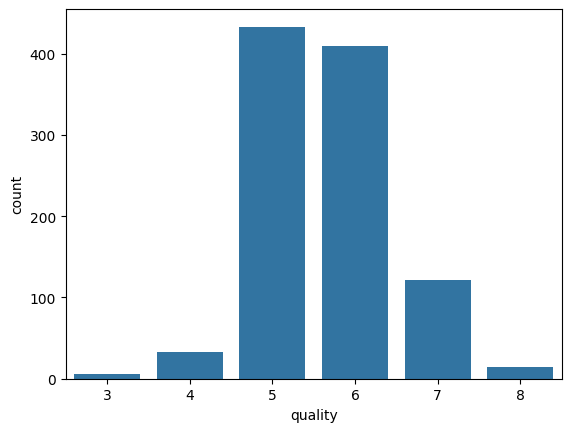

In [33]:
sns.countplot(x='quality', data=df)
plt.show()


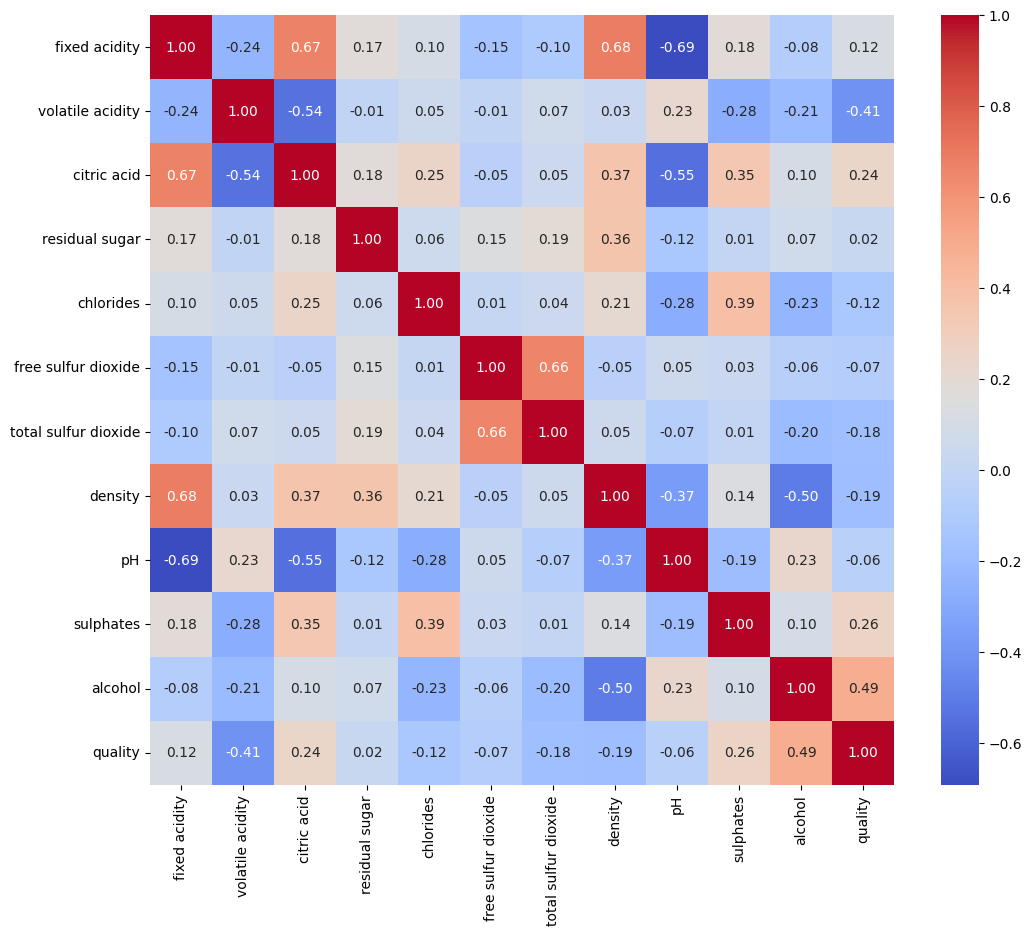

In [34]:
corr = df.corr()

# Set figure size (width, height)
plt.figure(figsize=(12,10))

# Plot heatmap
sns.heatmap(corr.round(4), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

outlier checking

In [35]:
df.shape

(1018, 12)

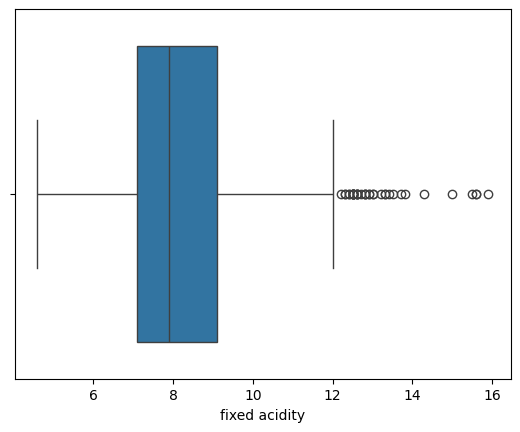

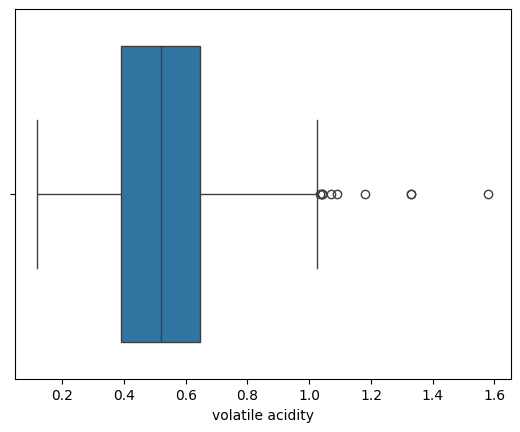

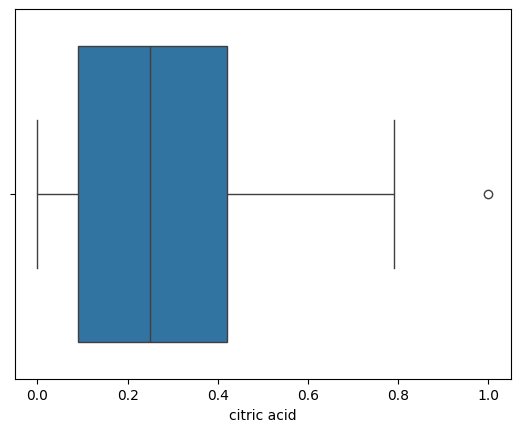

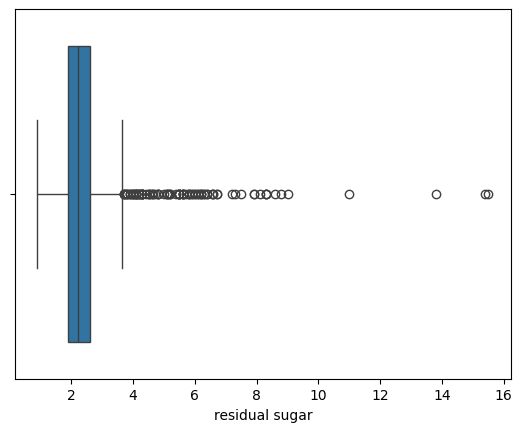

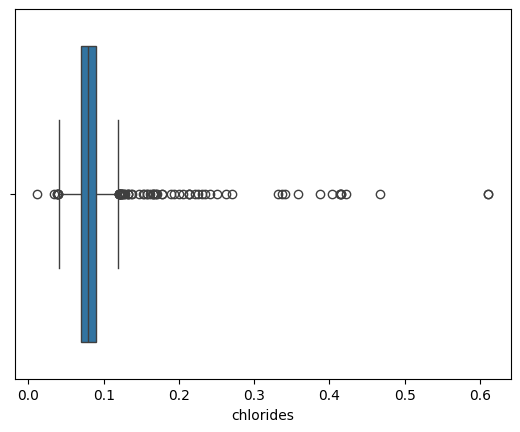

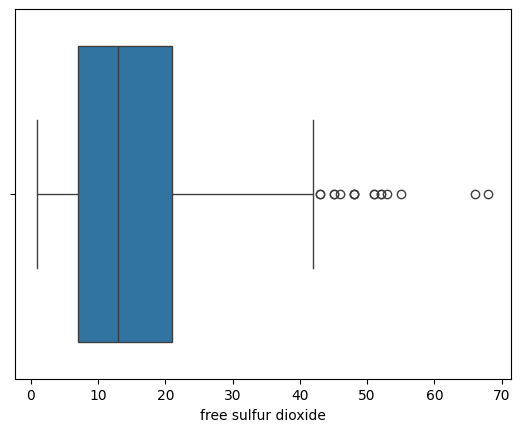

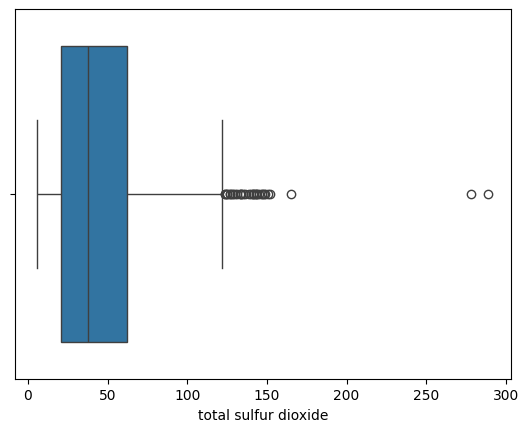

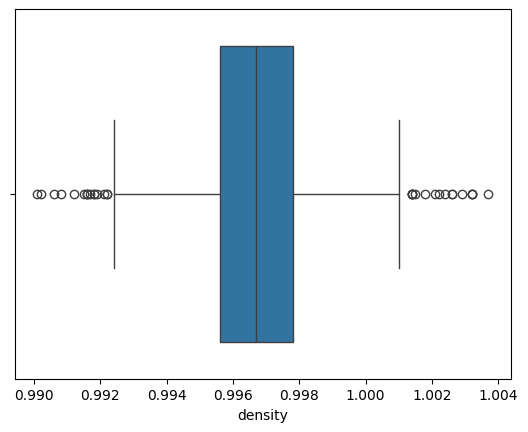

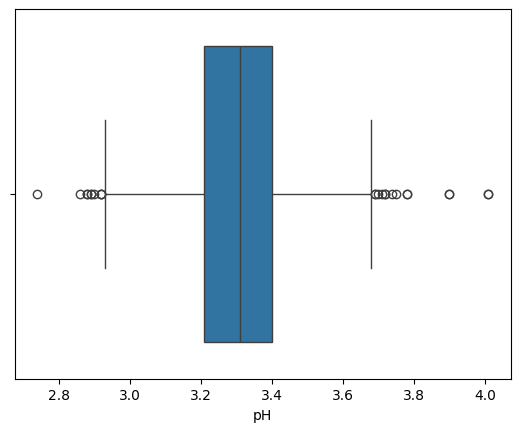

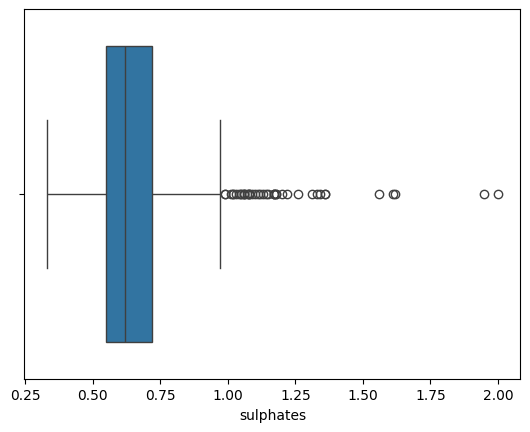

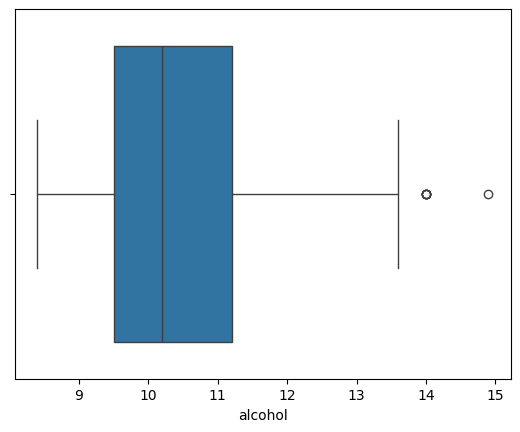

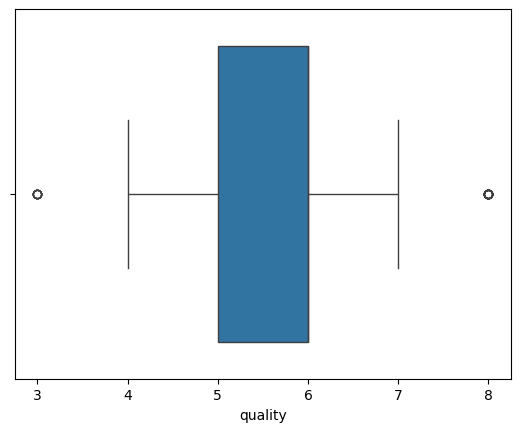

In [36]:
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[column])
    plt.show()


In [37]:
# Selecting numeric columns only
numeric_cols = df.select_dtypes(include='number').columns
# Remove outliers column by column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (713, 12)


EDA IS PERFORMED ON THE DATA SUCCESSFULLY


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [60]:
X = df.drop('quality', axis=1)  # Features
y = df['quality']               # Target (numeric)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Suppose y is categorical labels
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))

# Initialize model with class weights
model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={np.int64(4): np.float64(9.902777777777779),
                                     np.int64(5): np.float64(0.5713141025641025),
                                     np.int64(6): np.float64(0.5863486842105263),
                                     np.int64(7): np.float64(2.2563291139240507)},
                       random_state=42)

In [67]:
# Predict on test set
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5664335664335665
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.57      0.77      0.66        60
           6       0.56      0.52      0.54        62
           7       0.60      0.18      0.27        17

    accuracy                           0.57       143
   macro avg       0.43      0.36      0.37       143
weighted avg       0.56      0.57      0.54       143

Confusion Matrix:
 [[ 0  3  1  0]
 [ 1 46 13  0]
 [ 0 28 32  2]
 [ 0  3 11  3]]


In [69]:
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [70]:
# Compute balanced class weights
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))

In [71]:
# SVM model with class weights
model = SVC(
    kernel='rbf',          # You can also try 'linear', 'poly', or 'sigmoid'
    class_weight=class_weights,
    random_state=42
)

In [72]:
model.fit(X_train, y_train)

SVC(class_weight={np.int64(4): np.float64(9.902777777777779),
                  np.int64(5): np.float64(0.5713141025641025),
                  np.int64(6): np.float64(0.5863486842105263),
                  np.int64(7): np.float64(2.2563291139240507)},
    random_state=42)

In [73]:
y_pred = model.predict(X_test)

In [74]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3076923076923077
Classification Report:
               precision    recall  f1-score   support

           4       0.06      0.50      0.11         4
           5       0.53      0.32      0.40        60
           6       0.54      0.24      0.33        62
           7       0.17      0.47      0.25        17

    accuracy                           0.31       143
   macro avg       0.32      0.38      0.27       143
weighted avg       0.48      0.31      0.34       143

Confusion Matrix:
 [[ 2  1  1  0]
 [14 19 10 17]
 [13 13 15 21]
 [ 4  3  2  8]]


In [75]:
# If not installed, uncomment the next line
# !pip install lightgbm

import lightgbm as lgb
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [76]:
# Compute balanced class weights
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))

In [77]:
model = lgb.LGBMClassifier(
    objective='multiclass',           # multi-class classification
    num_class=len(classes),
    class_weight=class_weights,       # handle imbalance
    random_state=42
)

In [78]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 11
[LightGBM] [Info] Start training from score -1.403889
[LightGBM] [Info] Start training from score -1.366148
[LightGBM] [Info] Start training from score -1.380664
[LightGBM] [Info] Start training from score -1.394888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

LGBMClassifier(class_weight={np.int64(4): np.float64(9.902777777777779),
                             np.int64(5): np.float64(0.5713141025641025),
                             np.int64(6): np.float64(0.5863486842105263),
                             np.int64(7): np.float64(2.2563291139240507)},
               num_class=4, objective='multiclass', random_state=42)

In [79]:
y_pred = model.predict(X_test)

In [80]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5594405594405595
Classification Report:
               precision    recall  f1-score   support

           4       0.33      0.25      0.29         4
           5       0.56      0.70      0.62        60
           6       0.56      0.50      0.53        62
           7       0.60      0.35      0.44        17

    accuracy                           0.56       143
   macro avg       0.51      0.45      0.47       143
weighted avg       0.56      0.56      0.55       143

Confusion Matrix:
 [[ 1  2  1  0]
 [ 1 42 16  1]
 [ 1 27 31  3]
 [ 0  4  7  6]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [10:19:56] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.5734265734265734
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      0.65      0.62        62
           2       0.52      0.56      0.54        61
           3       0.80      0.50      0.62        16

    accuracy                           0.57       143
   macro avg       0.48      0.43      0.44       143
weighted avg       0.57      0.57      0.57       143

Confusion Matrix:
 [[ 0  2  2  0]
 [ 0 40 22  0]
 [ 1 24 34  2]
 [ 0  1  7  8]]


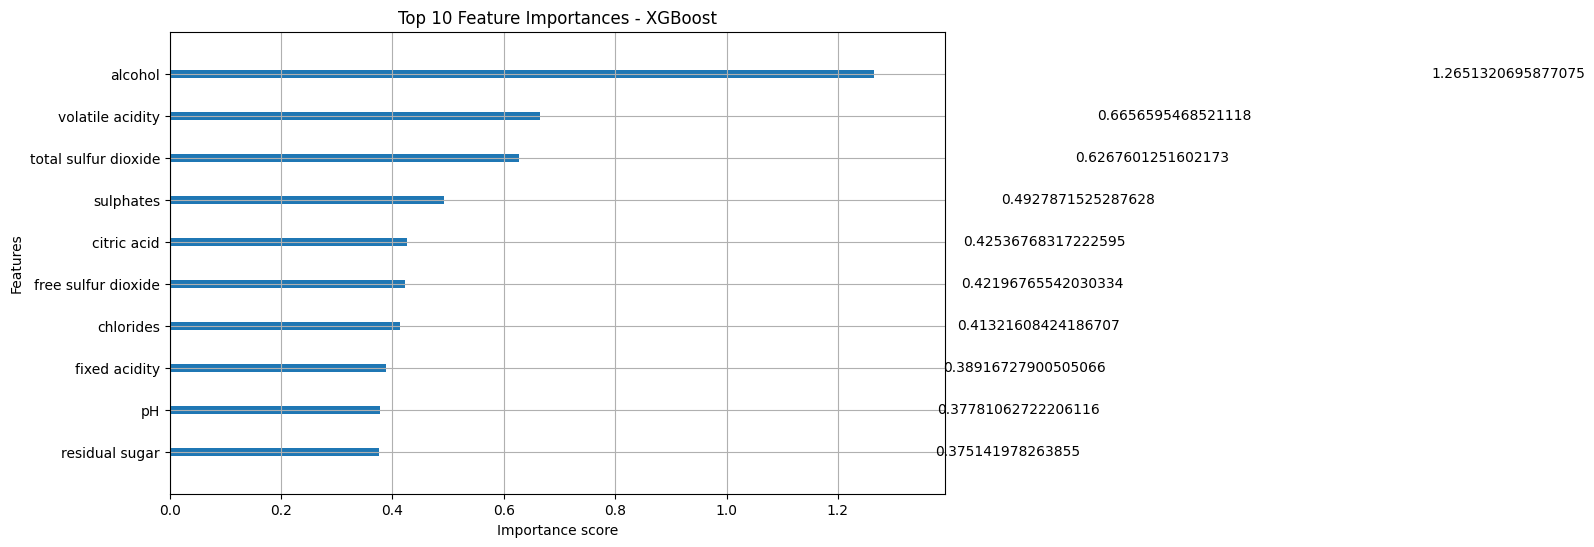

In [82]:
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

# -------------------------
# 2️⃣ Prepare data
# -------------------------
# Assume your dataframe is df and quality column is 'target'
X = df.drop('quality', axis=1)
y = df['quality']

# Encode labels if they are strings
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# -------------------------
# 3️⃣ Compute class weights
# -------------------------
classes = np.unique(y_encoded)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_encoded)
class_weights_dict = dict(zip(classes, weights))

# Assign a weight to each sample
sample_weights = np.array([class_weights_dict[label] for label in y_encoded])

# -------------------------
# 4️⃣ Train-test split
# -------------------------
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X, y_encoded, sample_weights, test_size=0.2, random_state=42, stratify=y_encoded
)

# -------------------------
# 5️⃣ Initialize XGBoost classifier
# -------------------------
model = xgb.XGBClassifier(
    objective='multi:softmax',       # multi-class classification
    num_class=len(classes),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# -------------------------
# 6️⃣ Train model with sample weights
# -------------------------
model.fit(X_train, y_train, sample_weight=sw_train)

# -------------------------
# 7️⃣ Make predictions
# -------------------------
y_pred = model.predict(X_test)

# -------------------------
# 8️⃣ Evaluate model
# -------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------
# 9️⃣ Feature importance (optional)
# -------------------------
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,6))               # Create the figure
plot_importance(model, max_num_features=10, importance_type='gain', ax=plt.gca())
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()